<a href="https://colab.research.google.com/github/GHASS19/Customer-Churn/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting** **Customer** **Churn** **Project**

#**1. Import Libraries and read CSV file**

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import altair as alt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight


!pip install altair
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

# 1.1 Load the Data

In [ ]:
# Load the dataset
file_path = 'Customer Churn.csv'
df = pd.read_csv(file_path)

# **2. Data Wrangling**

# 2.1 View top of the dataframe

In [ ]:
df.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

# 2.2 Information on all Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

# 2.3 Description of the Columns

This is a description of our columns from the UC-Irvine Machine Learning Website:

**Call** **Failures**: number of call failures

**Complains**: binary (0: No complaint, 1: complaint)

**Subscription** Length: total months of subscription

**Charge** **Amount**: Ordinal attribute (0: lowest amount, 9: highest amount)

**Seconds** **of** **Use**: total seconds of calls

**Frequency** **of** **use**: total number of calls

**Frequency** **of** **SMS**: total number of text messages

**Distinct** **Called** **Numbers**: total number of distinct phone calls

**Age** **Group**: ordinal attribute (1: younger age, 5: older age)

**Tariff** **Plan**: binary (1: Pay as you go, 2: contractual)

**Status**: binary (1: active, 2: non-active)

**Churn**: binary (1: churn, 0: non-churn) - Class label

**Customer** **Value**: The calculated value of customer  



# 2.4 Describe the Columns

In [ ]:
df.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

This is some of the highlights:

 1. We have a wide range of call failures for each customer due to the high standard deviation of 7.263.

 2. We have more no complains than complains due to the mean being low at .0765.

 3. The average age of a customer was 30.99 and the customer value range was from 0-2165.28.

 4. On average the customers used text messages more than calls.

# 2.5 Shape

In [ ]:
df.shape

(3150, 14)

# 2.6 Column's Info

In [ ]:
df['Subscription  Length'].unique()

array([38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 18, 17, 15, 16,  9, 40,
       41, 29, 28, 20, 19, 11, 32, 24, 23, 13, 14,  7, 42, 43, 30, 22, 21,
       12,  5, 44, 45, 10,  3,  6,  8,  4, 46, 47])

In [ ]:
df['Subscription  Length'].median()

35.0

In [ ]:
df['Subscription  Length'].value_counts().head(8)

36    276
38    258
37    229
35    228
34    201
39    201
40    186
33    152
Name: Subscription  Length, dtype: int64

Here we can tell there are more customers who have a subscribtion for over two and half years to the telecom company in Iran than a few months.

In [ ]:
df['Charge  Amount'].median()

0.0

In [ ]:
df['Charge  Amount'].value_counts()

0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: Charge  Amount, dtype: int64

The charge amount from 0-10 is an unbalanced column with most customers being charged the lower amount of 0 or 1.

In [ ]:
df['Age'].unique()

array([30, 25, 15, 45, 55])

In [ ]:
df["Age Group"].unique()

array([3, 2, 1, 4, 5])

We only have five different ages from this dataset and only five age groups.

In [ ]:
df['Churn'].value_counts().head()

0    2655
1     495
Name: Churn, dtype: int64

Here we have an unbalanced dataset. When dealing with an imbalanced dataset, where one class is significantly more prevalent than the other (in this case, the "churn" class has a higher occurrence than the "non-churn" class), it's essential to address the imbalance before training the machine learning model. An imbalanced dataset can lead to biased model predictions, where the model might be biased towards the majority class and perform poorly on the minority class.

# **3. EDA**

# 3.1 Heatmap

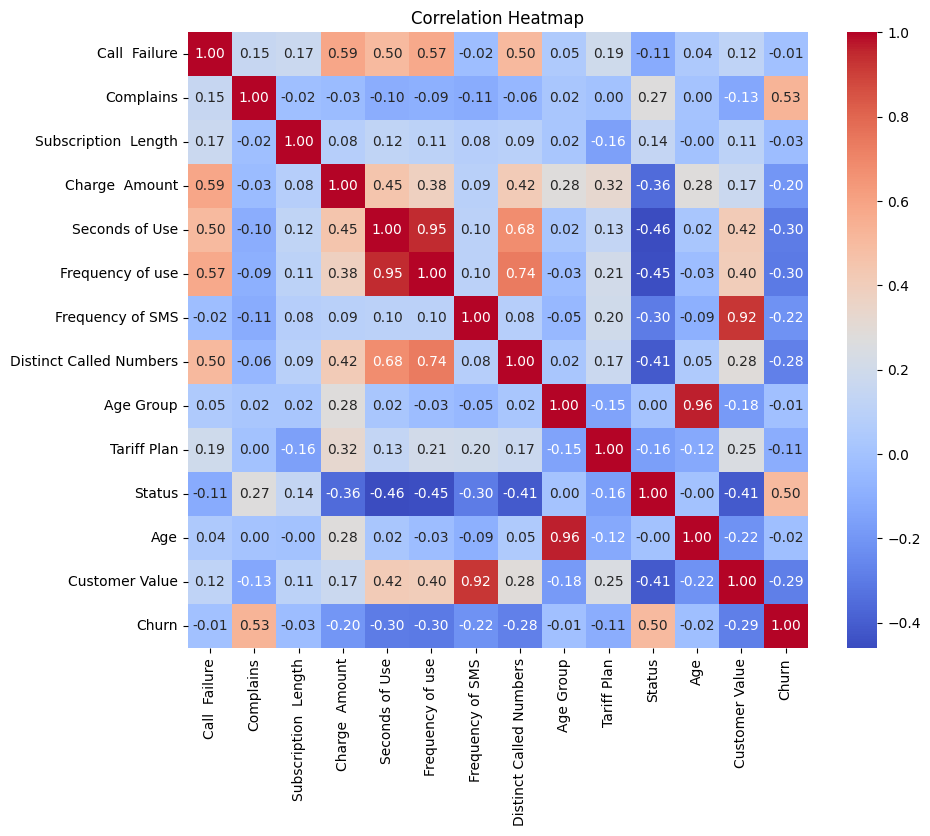

In [ ]:
#Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Some take aways from the heatmap:

High Correlation
1. .96, Age & Age Group. five different groups and five ages in this database.

2. .95, Seconds of Use & Frequency of use. This makes sense as more calls and seconds of calls go hand in hand.

3. .92, Customer Value & Frequency of SMS. This was the most interesting correlation. As the company values customers who use text messages.

Low Correlation

1. -.46, Status & Seconds of use. Obviously there is no correalation if the status of a customer is inactive, (2 for inactive and 1 for active) and seconds of telaphone calls.

2. -.45, Status & Frequency of Use. This makes sense just like the previous correlation.

3. -.41, Status & Distinct Called Numbers. Customers cannot dial more numbers if they are inactive.

# 3.2 Visualizations of the Columns

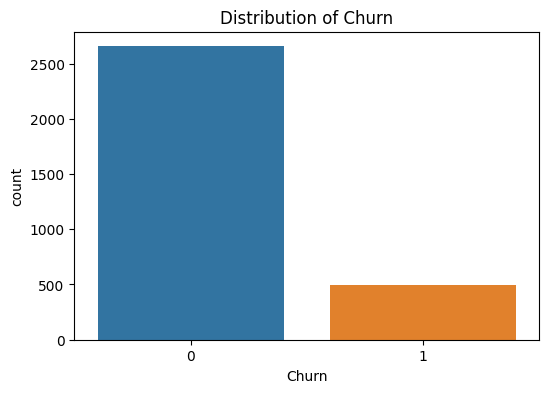

In [ ]:
# Distribution of churn (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

Most of the customers did not churn, which is good for the business.

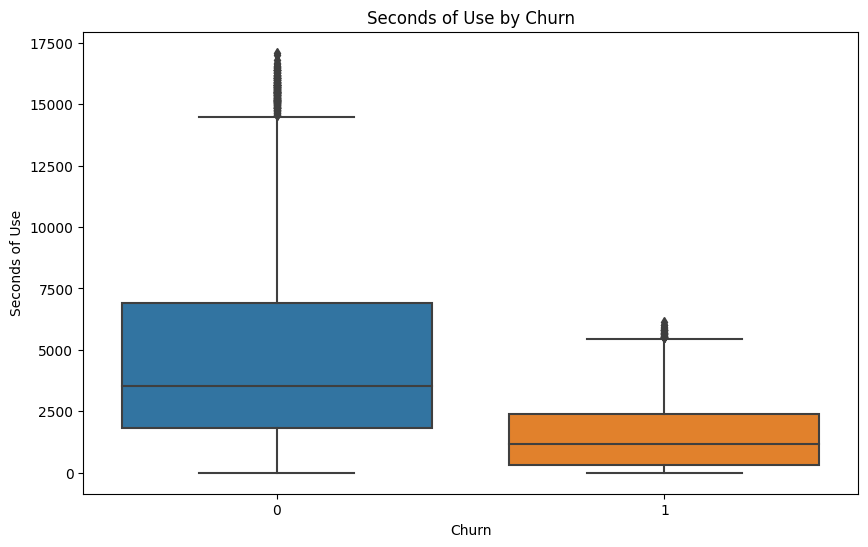

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Seconds of Use', data=df)
plt.title('Seconds of Use by Churn')
plt.show()

Those that use the used the phone company to make phone calls did so using it for a longer time then the customers who cancelled their subscribtion at the end of 12 months.

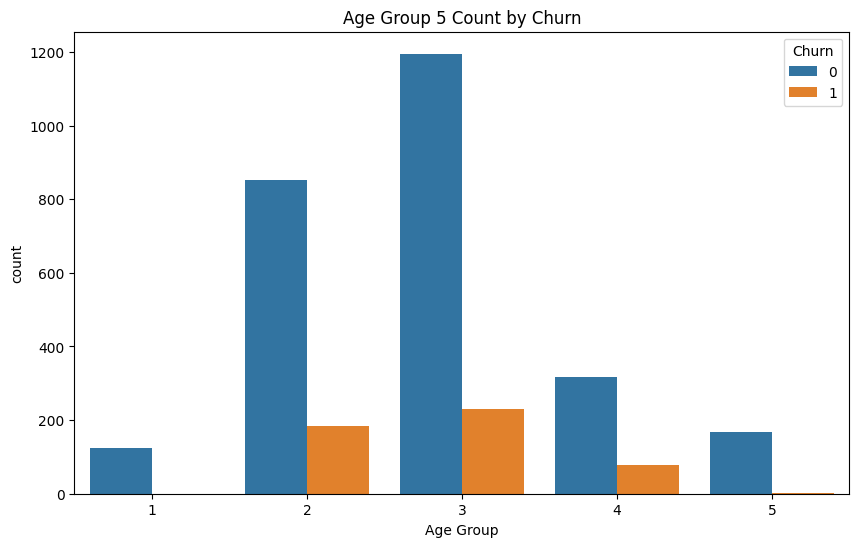

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Churn', data=df)
plt.title('Age Group 5 Count by Churn')
plt.show()

This graph is very useful for the telecommunicatons company. Here we can see that no customers in the oldest and youngest groups cancelled their membership. Very helpful for the company as they can target people in these two age groups. Also they could find out why customers in age groups 2-4 discontinued their services and see if they can fix the issue in manner that is good for the business.

# 3.3 Pairplot

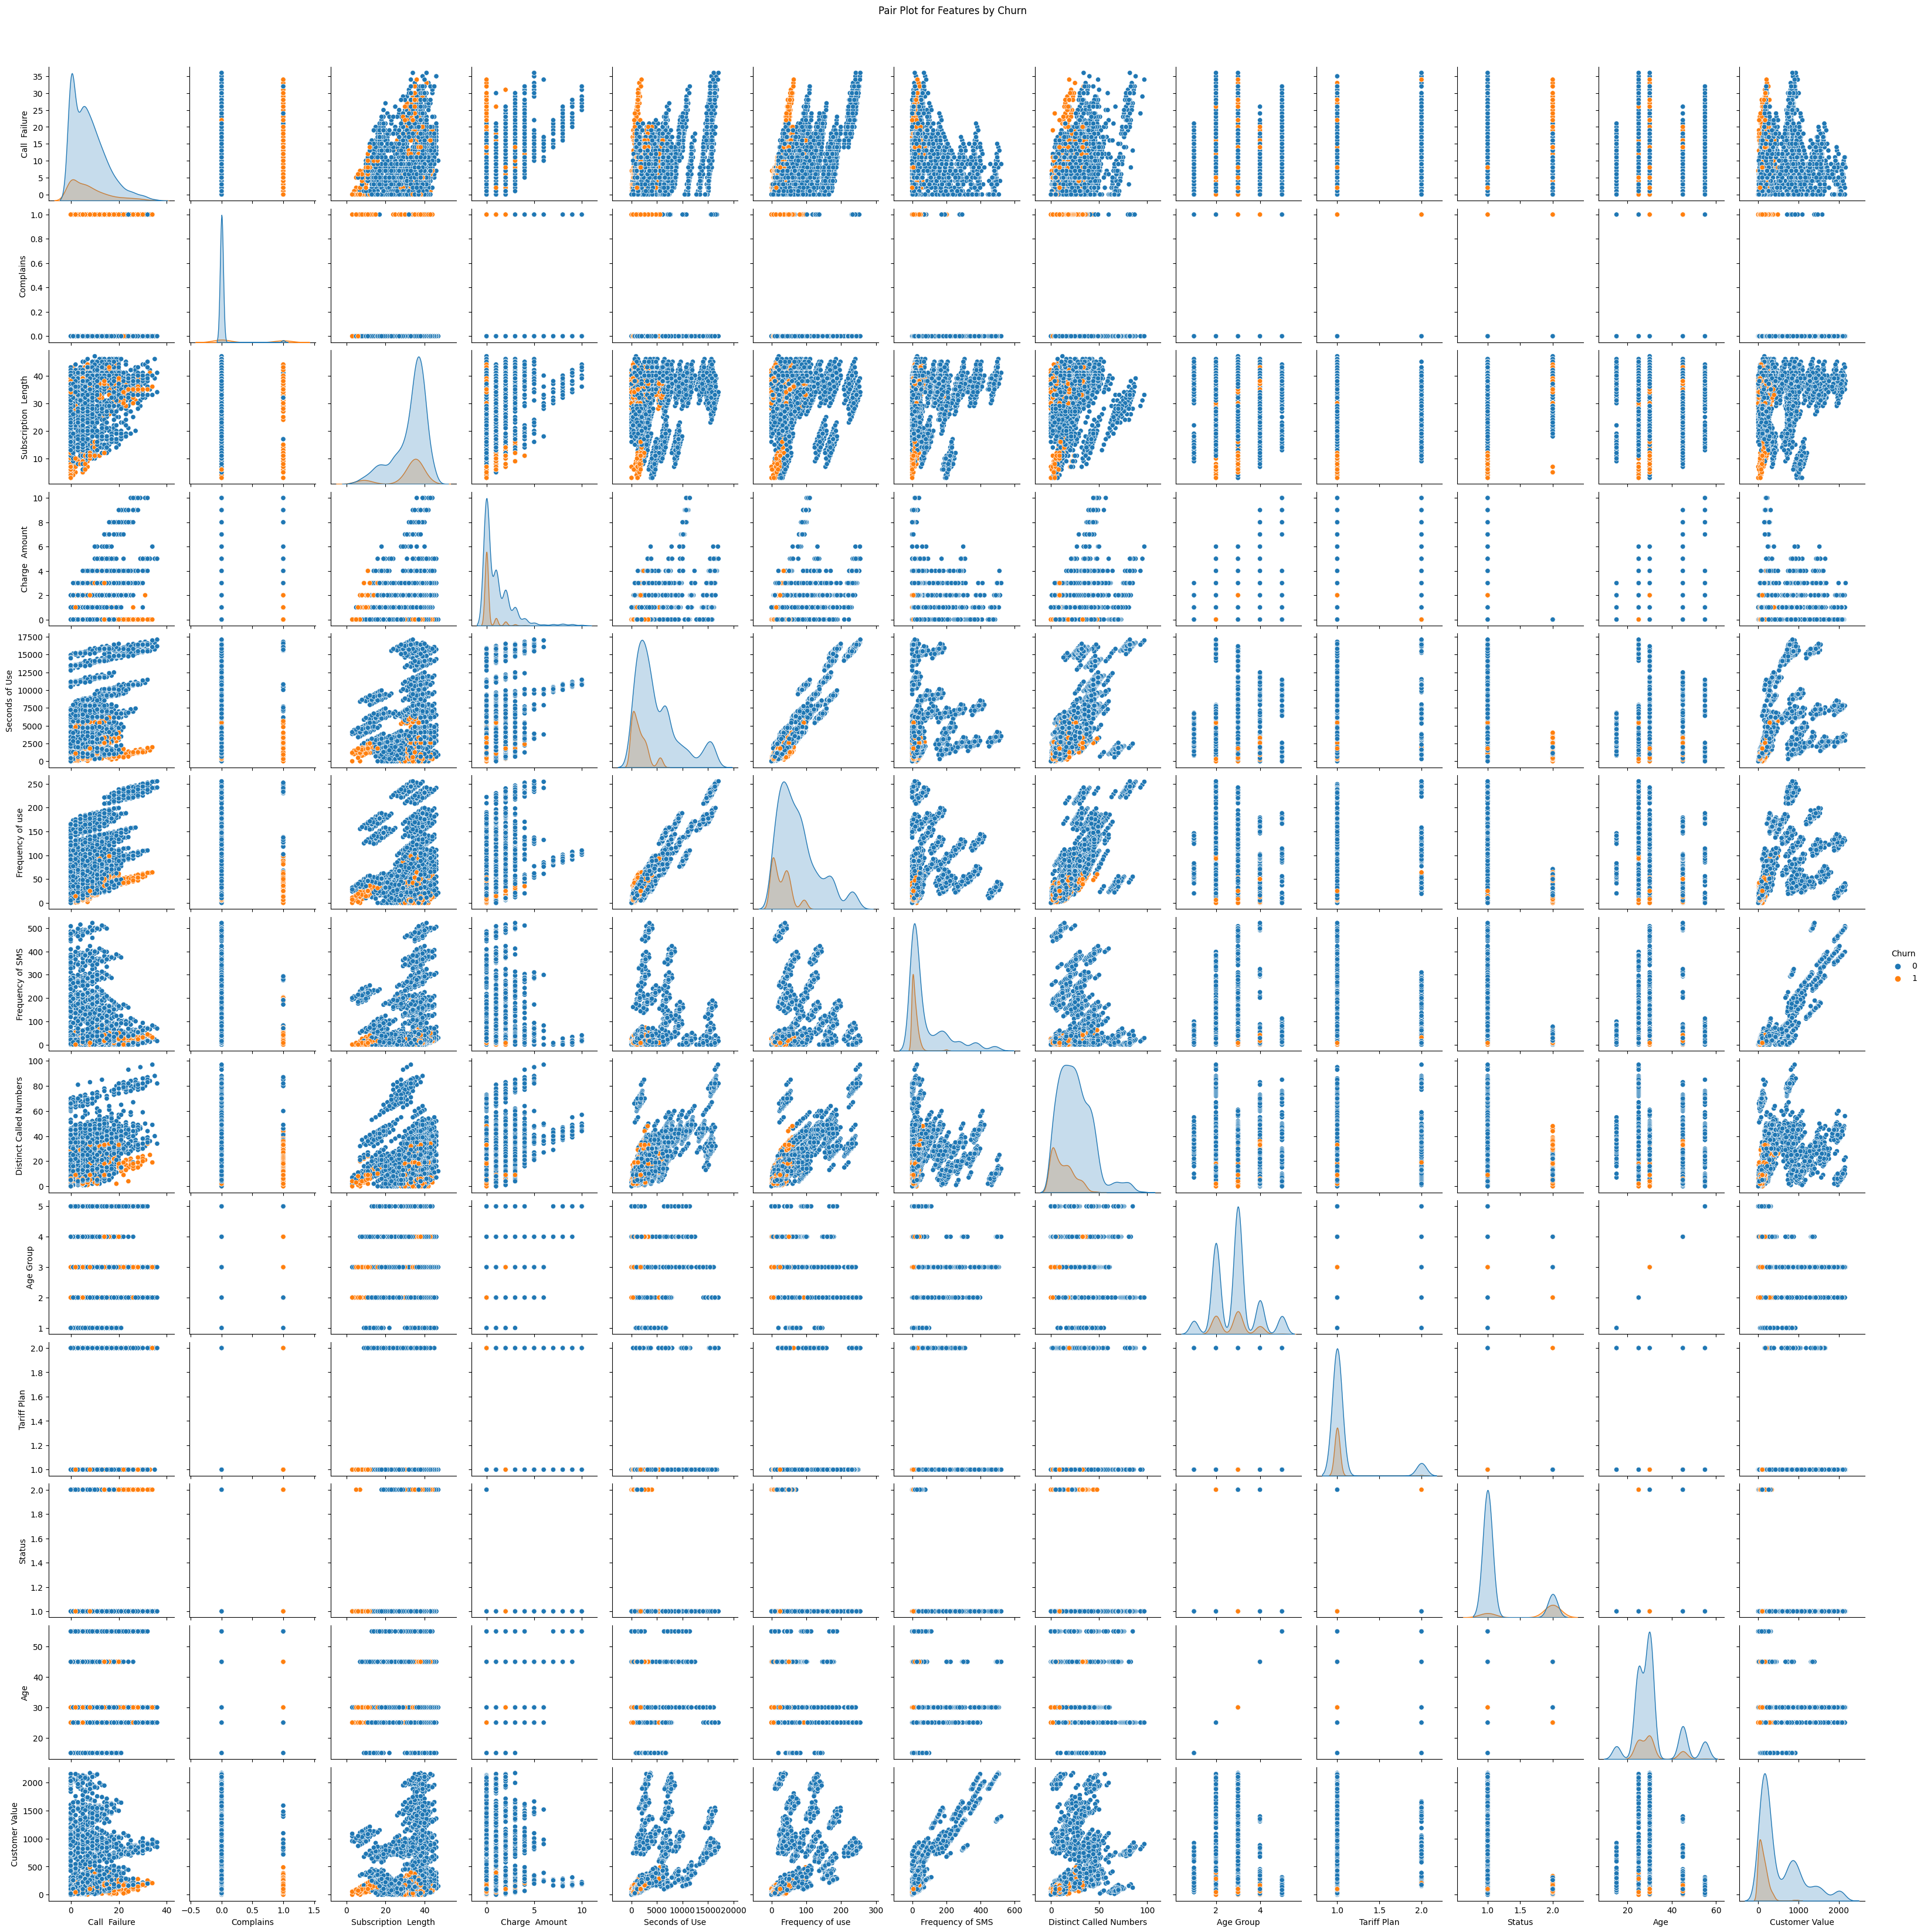

In [ ]:
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.suptitle('Pair Plot for Features by Churn', y=1.02)
plt.show()

The pair plot is good for visualizing all the variables against each other. Customer Value and Frequency of SMS had a linear relationship.

# 3.4 Comparing variables to other variables

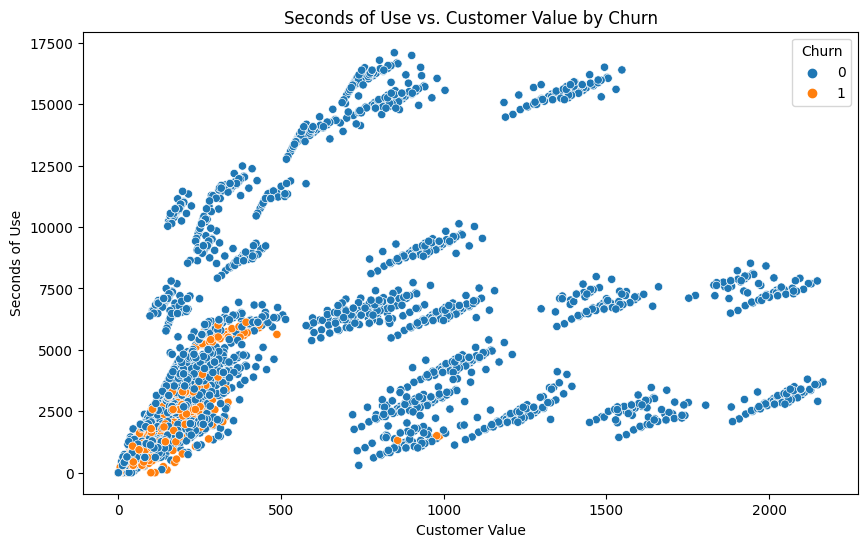

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer Value', y='Seconds of Use', hue='Churn', data=df)
plt.title('Seconds of Use vs. Customer Value by Churn')
plt.show()

Customers that churned did not use the phone company that much compared to those who keep using their services at the end of 12 months.

In [ ]:
# Create a DataFrame for the count of Tariff Plan and Status by Churn
tariff_plan_status_df = df.groupby(['Tariff Plan', 'Status', 'Churn']).size().reset_index(name='Count')

# Create a Plotly bar chart for Tariff Plan
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tariff_plan_status_df['Tariff Plan'][tariff_plan_status_df['Churn'] == 0],
    y=tariff_plan_status_df['Count'][tariff_plan_status_df['Churn'] == 0],
    name='Non-Churn',
    marker_color='lightblue'
))

fig.add_trace(go.Bar(
    x=tariff_plan_status_df['Tariff Plan'][tariff_plan_status_df['Churn'] == 1],
    y=tariff_plan_status_df['Count'][tariff_plan_status_df['Churn'] == 1],
    name='Churn',
    marker_color='lightcoral'
))

fig.update_layout(
    title='Distribution of Tariff Plan by Churn',
    xaxis_title='Tariff Plan',
    yaxis_title='Count',
    barmode='group',
    title_x=0.5,
    title_font=dict(size=24)
)

fig.show()

A very interesting find from this graph is that customers who had a contractual tariff plan, (2) did not churn at the end of the 12 months.

In [ ]:
# Create a Plotly bar chart for Status
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tariff_plan_status_df['Status'][tariff_plan_status_df['Churn'] == 0],
    y=tariff_plan_status_df['Count'][tariff_plan_status_df['Churn'] == 0],
    name='Non-Churn',
    marker_color='lightblue'
))

fig.add_trace(go.Bar(
    x=tariff_plan_status_df['Status'][tariff_plan_status_df['Churn'] == 1],
    y=tariff_plan_status_df['Count'][tariff_plan_status_df['Churn'] == 1],
    name='Churn',
    marker_color='lightcoral'
))

fig.update_layout(
    title='Distribution of Status by Churn',
    xaxis_title='Status',
    yaxis_title='Count',
    barmode='group',
    title_x=0.5,
    title_font=dict(size=24)
)

fig.show()

Customers who had a Active Status did not churm very much. Compared to Non-Active Status it was split almost 50/50 if they churned.

# 3.5 Boxplot

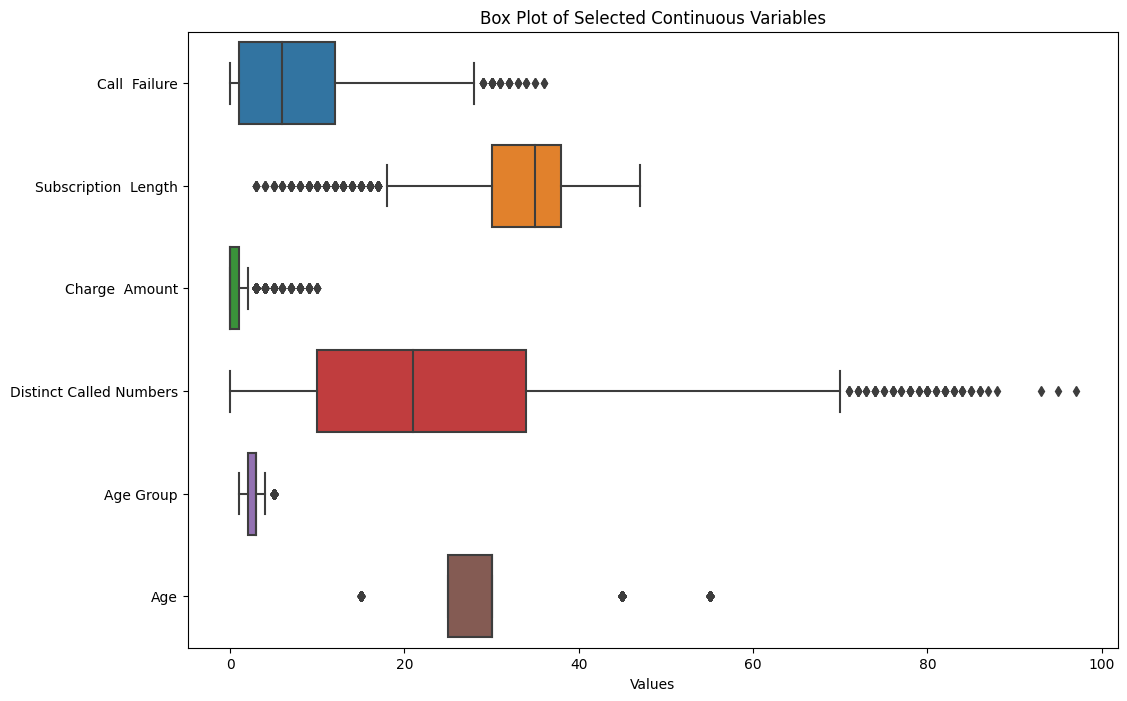

In [ ]:
# Columns to drop from the DataFrame since their only values are two numerical values.
columns_to_drop = ['Complains', 'Tariff Plan', 'Status', 'Churn', 'Seconds of Use', 'Customer Value', 'Frequency of use', 'Frequency of SMS']

# Drop the specified columns from the DataFrame
df_boxplot = df.drop(columns=columns_to_drop)

# Box plot to visualize the distribution of the selected continuous variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_boxplot, orient='h')
plt.title('Box Plot of Selected Continuous Variables')
plt.xlabel('Values')
plt.show()

1. Many low outliers for the subscription column that are below the 25% percentile.
2. As well as many high outliers for the distinct called numbers column above the 75th percentile.
3. The median for call failure is below 10 for each customer.

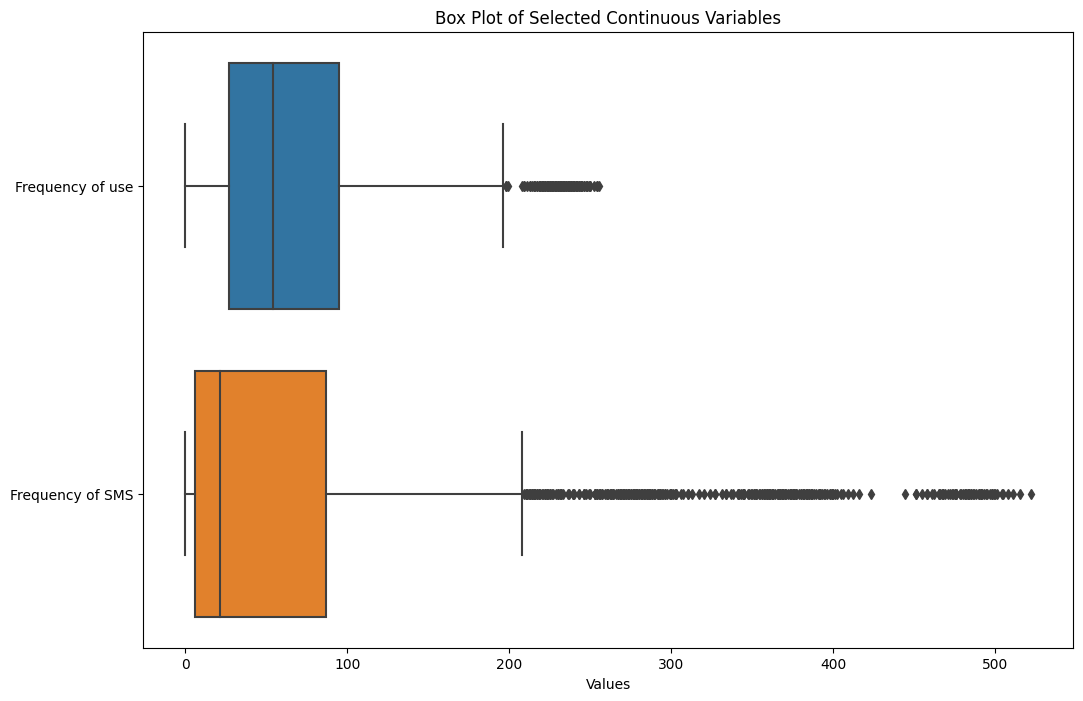

In [ ]:
columns_to_drop = ['Complains', 'Tariff Plan', 'Status', 'Churn', 'Seconds of Use', 'Call  Failure', 'Subscription  Length', 'Charge  Amount', 'Age', 'Age Group', 'Distinct Called Numbers', 'Customer Value' ]

# Drop the specified columns from the DataFrame
df_boxplot = df.drop(columns=columns_to_drop)

# Box plot to visualize the distribution of the selected continuous variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_boxplot, orient='h')
plt.title('Box Plot of Selected Continuous Variables')
plt.xlabel('Values')
plt.show()



The frenquency which the customers use text messages has many high outliers but has a low median near 10 texts. The frequency of calls has some high outliers beyond the maxium as well. The median for calls per customers is around 50.

#4. Data Preprocessing & Training
---

I will try Logistic Regression, RandomForestClassifier, GradientBoostingClassifier and Support Vector Machine to predict if a customer will churn or not. Then we will evaluate the models and then find the best parameters for each model using cross validation and grid search. These four classification models are typically the best at predicting customer churn.

#4.1 Lets evaluate the models compared to each other.

In [ ]:
# Assuming you have already preprocessed your data and have the feature columns in X and the target column in y
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance with class weights for Logistic Regression and Random Forest
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

In [ ]:
# Model Training
models = {
    'Logistic Regression': LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

In [ ]:
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score,
    'ROC-AUC': roc_auc_score
}

In [ ]:
# Initialize an empty list to store the metrics DataFrames for each model
metrics_dfs = []

for model_name, model in models.items():
    # For Gradient Boosting and Support Vector Machine, use SMOTE for handling class imbalance
    if model_name in ['Gradient Boosting', 'Support Vector Machine']:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
        model.fit(X_train_resampled, y_train_resampled)
    else:
        model.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test_scaled)

    # Calculate the metrics
    metrics_values = [metric(y_test, y_pred) for metric in metrics.values()]

    # Create a DataFrame with model name and metrics
    metrics_df = pd.DataFrame([[model_name] + metrics_values], columns=['Model'] + list(metrics.keys()))

    # Append the DataFrame to the list
    metrics_dfs.append(metrics_df)

# 4.2 Definitions of the five scores:

---



1. **Accuracy**: This metric measures the overall correctness of the model's predictions. It is the ratio of correctly predicted samples to the total number of samples. While accuracy is easy to interpret, it may not be the best metric when classes are imbalanced (i.e., there are significantly more non-churn customers than churn customers).

2. **Precision**: Precision is the ratio of true positive predictions to all positive predictions (true positives + false positives). It indicates the proportion of correctly predicted churn cases among all predicted churn cases. High precision is valuable when the cost of false positives (predicting churn when the customer doesn't churn) is high.

3. **Recall**: (Sensitivity or True Positive Rate): Recall is the ratio of true positive predictions to all actual positive samples (true positives + false negatives). It shows the proportion of correctly predicted churn cases among all actual churn cases. High recall is valuable when the cost of false negatives (missing churn customers) is high.

4. **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall and is useful when you want to find a good trade-off between these two metrics.

5. **ROC-AUC score**: The Receiver Operating Characteristic Area Under the Curve (ROC-AUC) is a metric that evaluates the model's ability to discriminate between the two classes. It considers the trade-off between true positive rate (recall) and false positive rate. A higher ROC-AUC score indicates better discrimination ability.

# 4.3 Comparing the Model's Score

Now we need to look at the five scores to help us compare the classification models, Accuracy, Precision, Recall, F1 Score, ROC-AUC score for each model to predict customer churn.

In [ ]:
# Concatenate all the metrics DataFrames into a single DataFrame
metrics_df = pd.concat(metrics_dfs, ignore_index=True)

# Print the metrics for each model
for model_name in models.keys():
    print(f"Metrics for {model_name}:")
    model_metrics = metrics_df[metrics_df['Model'] == model_name].iloc[:, 1:]
    print(model_metrics)
    print("\n")

Metrics for Logistic Regression:
   Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  0.831746   0.511236  0.827273  0.631944  0.829983


Metrics for Random Forest:
   Accuracy  Precision    Recall  F1-Score   ROC-AUC
1  0.936508   0.836538  0.790909  0.813084  0.879108


Metrics for Gradient Boosting:
   Accuracy  Precision    Recall  F1-Score   ROC-AUC
2  0.904762   0.678571  0.863636      0.76  0.888549


Metrics for Support Vector Machine:
   Accuracy  Precision    Recall  F1-Score   ROC-AUC
3  0.866667   0.570652  0.954545  0.714286  0.901311




# 4.4 Random Forest Model is the best Model so far
---
Based on these evaluation metrics, it seems that the Random Forest model performs the best in terms of accuracy, precision, and F1-score. It achieves the highest accuracy (0.936508) among all models and relatively good precision and recall values, resulting in a good F1-score (0.813084).

# 4.5 F1 Score of RF Model
---
An F1 score of .81 is quite good for a customer churn project, especially when dealing with an imbalanced target variable. In projects with imbalanced classes, such as customer churn prediction, where the majority of customers are likely to stay (negative class), achieving high accuracy alone might not be sufficient to evaluate model performance.

The F1 score is a suitable metric for imbalanced datasets as it considers both precision and recall, providing a balance between correctly identifying positive samples (churned customers) and minimizing false positives (incorrectly predicting a customer will churn). An F1 score of .81 indicates that the model is performing well in correctly identifying churned customers while keeping false positives relatively low. Thus I recommend we use the Random Forest Model before we do a cross validation to insure the model scores are relevent. Then grid search to find the best parameters for each model.

In most imbalanced scenarios, you would want to strike a balance between precision and recall. High recall ensures that you capture a significant portion of actual churn cases, while high precision ensures that you avoid making too many false positive predictions. Therefore, the F1-score is often considered a good metric for imbalanced datasets because it combines both precision and recall.

# 4.6 Graph comparing the four models:

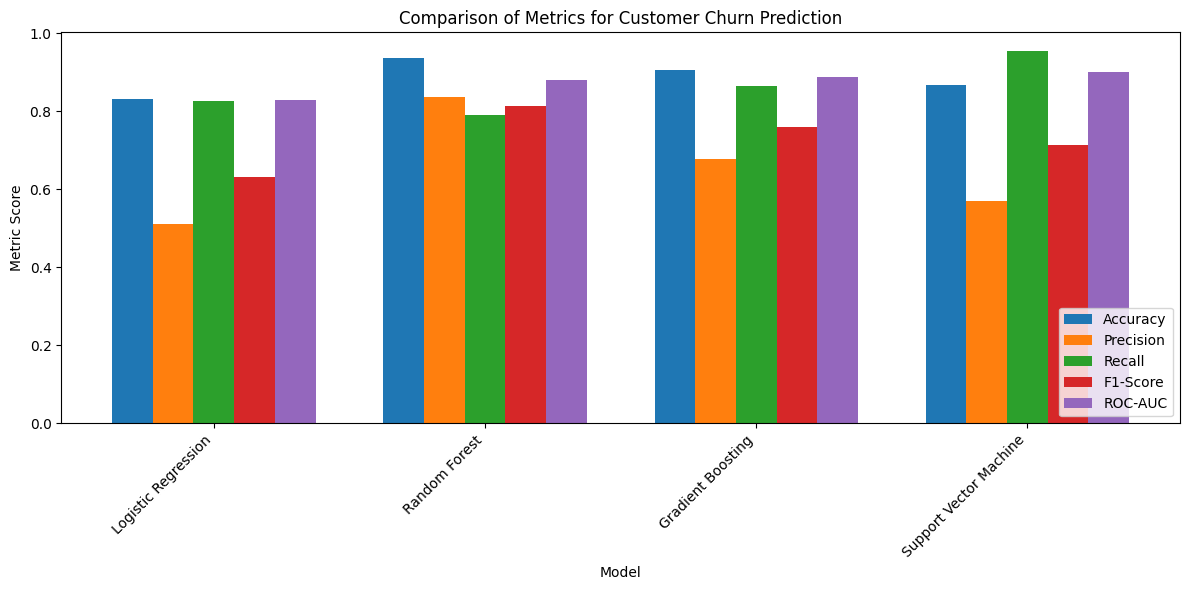

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(models))

for i, (metric_name, metric_function) in enumerate(metrics.items()):
    plt.bar(index + (i * bar_width), metrics_df[metric_name], bar_width, label=metric_name)

plt.xlabel('Model')
plt.ylabel('Metric Score')
plt.title('Comparison of Metrics for Customer Churn Prediction')
plt.xticks(index + bar_width * 2, models.keys(), rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()

From the graph we can see that the Gradient Boosting model and the Random Forest Models are clearly the best at predicting customer churn from an accuracy stand point. Below is a graph comparing the ROC-AUC and F1-Score between the four models.

# 4.7 Comparing the ROC-AUC & F1-Score of the Models

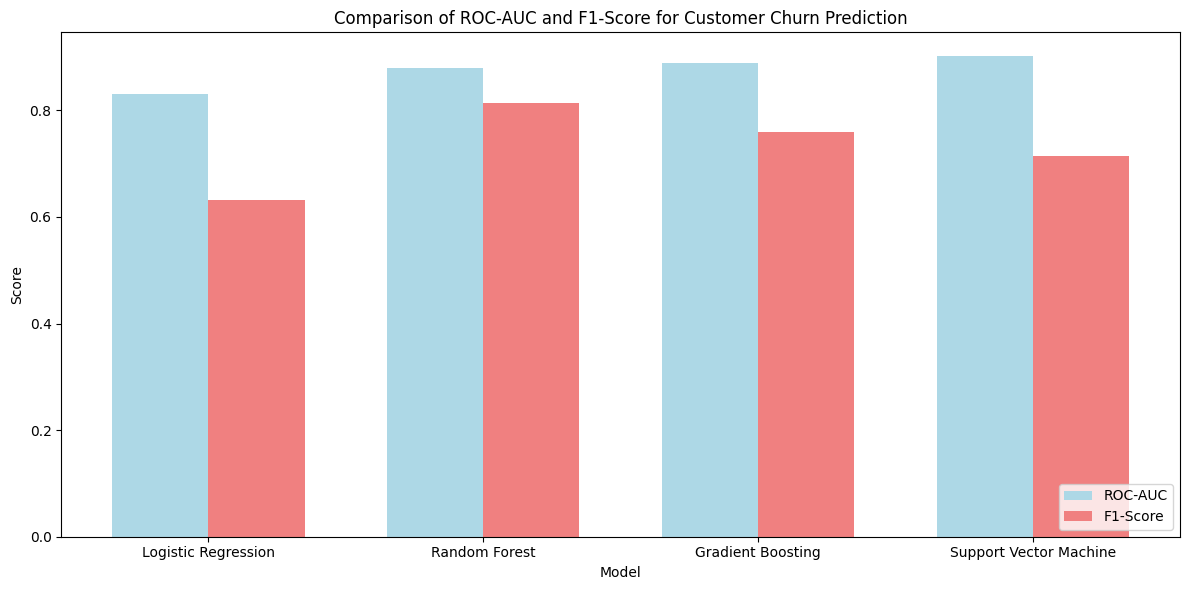

In [ ]:
# Create the bar plot for ROC-AUC and F1-Score
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(models))

roc_auc_scores = []
f1_scores = []

for i, (model_name, _) in enumerate(models.items()):
    model_metrics = metrics_df[metrics_df['Model'] == model_name].iloc[:, 1:]
    roc_auc_scores.append(model_metrics['ROC-AUC'].values[0])
    f1_scores.append(model_metrics['F1-Score'].values[0])

plt.bar(index, roc_auc_scores, bar_width, label='ROC-AUC', color='lightblue')
plt.bar(index + bar_width, f1_scores, bar_width, label='F1-Score', color='lightcoral')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of ROC-AUC and F1-Score for Customer Churn Prediction')
plt.xticks(index + bar_width / 2, list(models.keys()))
plt.legend(loc='lower right')
plt.tight_layout()

# Show the plot
plt.show()

A higher ROC-AUC score indicates that the model is better at distinguishing between churn and non-churn cases, which is particularly important in imbalanced datasets where the number of churn cases is small compared to non-churn cases. A model with a higher ROC-AUC score is better at controlling the trade-off between true positive rate (sensitivity/recall) and false positive rate, which is crucial in the context of customer churn prediction.

# **4.8 Cross Validation & Grid Search for Each Model**

 Now we will do cross validation and grid search to see which model is truly the best and what parameters are the best for predicting if the customer will churn or not at the end of 12 months.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
log_reg_param_grid = {'C': [0.1, 1, 10],
                      'penalty': ['l2']}
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20]}
gb_param_grid = {'n_estimators': [50, 100, 150],
                 'learning_rate': [0.05, 0.1, 0.2]}
svm_param_grid = {'C': [1, 10, 100],
                  'kernel': ['linear', 'rbf']}

# Create a dictionary of models and their corresponding hyperparameter grids
models_param_grids = {
    'Logistic Regression': (LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42), log_reg_param_grid),
    'Random Forest': (RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42), rf_param_grid),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), gb_param_grid),
    'Support Vector Machine': (SVC(probability=True, random_state=42), svm_param_grid)
}

# Initialize an empty DataFrame to store the results of grid search
grid_search_results = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best ROC-AUC Score', 'Best F1-Score'])

# Initialize an empty list to store the metrics DataFrames for each model
metrics_dfs = []

for model_name, (model, param_grid) in models_param_grids.items():
    print(f"Performing Grid Search with Cross-Validation for {model_name}...")

    # Initialize GridSearchCV with the model and parameter grid
    grid_search = GridSearchCV(model, param_grid, scoring=['roc_auc', 'f1'], refit='f1', cv=5, n_jobs=-1)

    # Perform Grid Search with Cross-Validation
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters and best scores from grid search
    best_params = grid_search.best_params_
    best_roc_auc_score = grid_search.best_score_
    best_f1_score = grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]

    # Add the results to the grid search DataFrame
    grid_search_results = pd.concat([grid_search_results, pd.DataFrame([[model_name, best_params, best_roc_auc_score, best_f1_score]], columns=grid_search_results.columns)],
                                    ignore_index=True)

    # Model Evaluation
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Create a DataFrame with model name and metrics
    metrics_df = pd.DataFrame([[model_name, accuracy, precision, recall, f1, roc_auc]], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

    # Append the DataFrame to the list
    metrics_dfs.append(metrics_df)

# Concatenate all the metrics DataFrames into a single DataFrame
metrics_df = pd.concat(metrics_dfs, ignore_index=True)

# Print the results of grid search
print("\nGrid Search Results:")
print(grid_search_results)

# Print the metrics for each model in a user-friendly format
print("\nMetrics for each model:")
print(metrics_df)


Performing Grid Search with Cross-Validation for Logistic Regression...
Performing Grid Search with Cross-Validation for Random Forest...
Performing Grid Search with Cross-Validation for Gradient Boosting...
Performing Grid Search with Cross-Validation for Support Vector Machine...

Grid Search Results:
                    Model                              Best Parameters  \
0     Logistic Regression                    {'C': 1, 'penalty': 'l2'}   
1           Random Forest     {'max_depth': None, 'n_estimators': 200}   
2       Gradient Boosting  {'learning_rate': 0.2, 'n_estimators': 150}   
3  Support Vector Machine                  {'C': 100, 'kernel': 'rbf'}   

   Best ROC-AUC Score  Best F1-Score  
0            0.649598       0.649598  
1            0.855738       0.855738  
2            0.833472       0.833472  
3            0.860540       0.860540  

Metrics for each model:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  

# **4.9 Comparing the Models**  
# **Logistic Regression:**
---
**Accuracy**: 0.831746

**Precision**: 0.511236

**Recall**: 0.827273

**F1-Score**: 0.631944

This model achieved an accuracy of 83.17%, which is relatively good for an imbalanced dataset.
It has a precision of 51.12%, indicating that when it predicts a customer will churn, it is correct about 51.12% of the time.
The recall score is 82.73%, suggesting that the model can correctly identify 82.73% of the actual churned customers.
The F1-Score, which balances precision and recall, is 63.19%, indicating a reasonable trade-off between precision and recall.
The ROC-AUC score of 82.99% suggests that the model can effectively distinguish between the positive and negative classes.

# **Random Forest:**
---
**Accuracy**: 0.936508

**Precision**: 0.836538

**Recall**: 0.790909

**F1-Score**: 0.813084

**ROC-AUC**: 0.879108

The Random Forest model achieved an accuracy of 93.65%, which is higher than Logistic Regression, indicating better overall performance.
It has a higher precision of 83.65%, indicating improved precision in identifying churned customers.
The recall score is 79.09%, slightly lower than Logistic Regression, but still capturing a substantial portion of churned customers.
The F1-Score of 81.31% indicates a balanced trade-off between precision and recall.
The ROC-AUC score of 87.91% suggests a better ability to separate the two classes compared to Logistic Regression.

# Gradient Boosting:
---
**Accuracy**: 0.946032

**Precision**: 0.880000

**Recall**: 0.800000

**F1-Score**: 0.838095

**ROC-AUC**: 0.888462

The Gradient Boosting model achieved the highest accuracy of 94.60%, indicating the best overall performance among all models.
It has the highest precision of 88.00%, signifying its effectiveness in correctly predicting churned customers.
The recall score of 80.00% suggests it can identify a significant portion of actual churned customers.
The F1-Score of 83.81% is the highest among all models, indicating the best balance between precision and recall.
The ROC-AUC score of 88.85% suggests a strong ability to distinguish between the two classes.

# Support Vector Machine:
---
**Accuracy**: 0.942857

**Precision**: 0.855769

**Recall**: 0.809091

**F1-Score**: 0.831776

**ROC-AUC**: 0.890122

This one achieved an accuracy of 94.29%, which is comparable to Gradient Boosting.
It has a precision of 85.58%, indicating good performance in predicting churned customers.
The recall score is 80.91%, capturing a significant proportion of actual churned customers.
The F1-Score of 83.18% is slightly lower than Gradient Boosting but still balanced.
The ROC-AUC score of 89.01% is the highest among all models, suggesting excellent class separation.

**Overall** **Comparison**: The Gradient Boosting and Support Vector Machine models stand out as top-performing models for customer churn prediction in this imbalanced dataset. Both models show high accuracy, precision, recall, F1-Score, and ROC-AUC scores. However, the Gradient Boosting model edges slightly ahead with the highest F1-Score and competitive ROC-AUC score.

Therefore, the **Gradient** **Boosting** **Model** is the recommended choice for predicting customer churn in this scenario. However, it's essential to consider other factors such as computational complexity and interpretability before making a final decision.

# 4.10 Visualization of the four Model's Scores

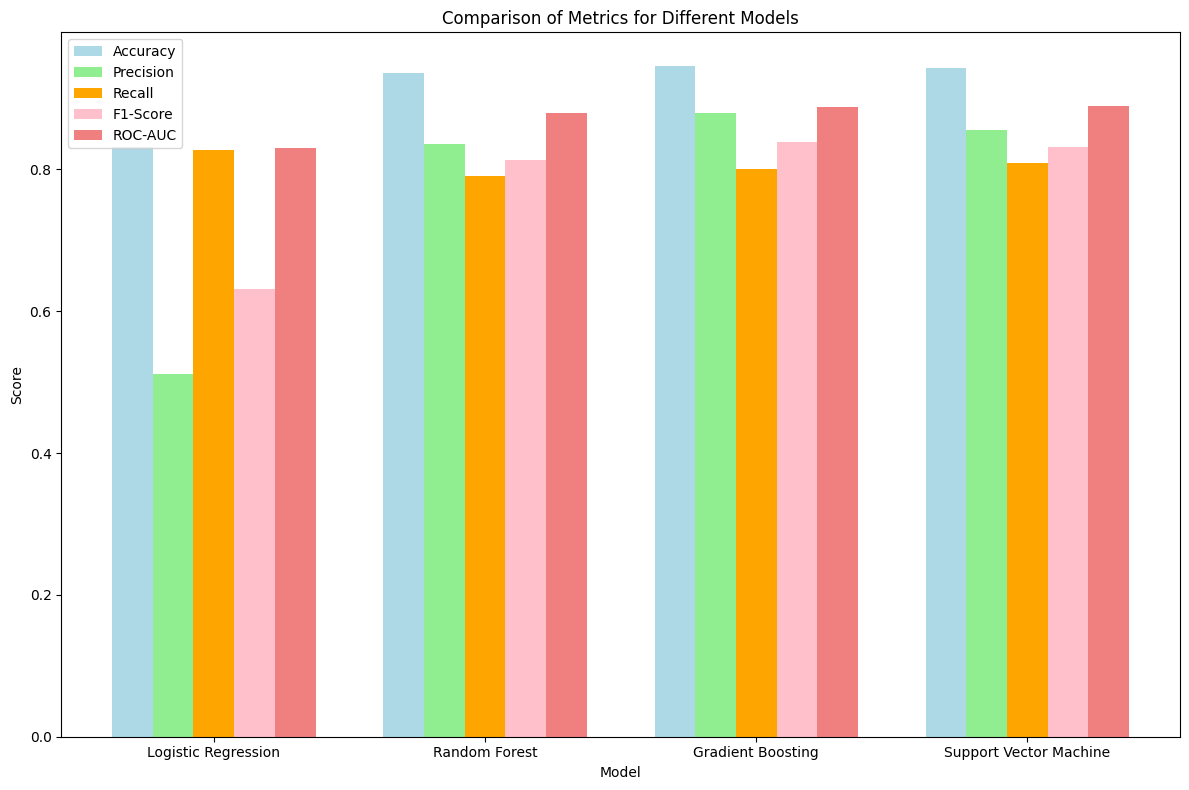

In [ ]:
# Data for the models and metrics
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
accuracy_scores = [0.831746, 0.936508, 0.946032, 0.942857]
precision_scores = [0.511236, 0.836538, 0.880000, 0.855769]
recall_scores = [0.827273, 0.790909, 0.800000, 0.809091]
f1_scores = [0.631944, 0.813084, 0.838095, 0.831776]
roc_auc_scores = [0.829983, 0.879108, 0.888462, 0.890122]

# Create the bar plot
plt.figure(figsize=(12, 8))
width = 0.15
x = range(len(models))

plt.bar(x, accuracy_scores, width, label='Accuracy', color='lightblue')
plt.bar([i + width for i in x], precision_scores, width, label='Precision', color='lightgreen')
plt.bar([i + 2 * width for i in x], recall_scores, width, label='Recall', color='orange')
plt.bar([i + 3 * width for i in x], f1_scores, width, label='F1-Score', color='pink')
plt.bar([i + 4 * width for i in x], roc_auc_scores, width, label='ROC-AUC', color='lightcoral')

# Set labels, ticks, and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Different Models')
plt.xticks([i + 2 * width for i in x], models)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Very quickly we can see that

# 4.11 What is the best Metric for our Imbalanced Target Variable?

The best metric depends on the specific business context and the costs associated with false positives and false negatives. For example:

1. **Recall**. If you want to minimize false negatives (i.e., you want to catch as many customers who will churn as possible), then recall might be the most important metric.

2. **Precision**. If you want to minimize false positives (i.e., you want to avoid predicting churn for customers who won't churn), then precision might be the most important metric.

3. **ROC-AUC**. If you want to evaluate the overall discrimination ability of the model, ROC-AUC score is useful.

4. **F1-Score-**. In most imbalanced scenarios, you would want to strike a balance between precision and recall. High recall ensures that you capture a significant portion of actual churn cases, while high precision ensures that you avoid making too many false positive predictions. Therefore, the F1-score is often considered a good metric for imbalanced datasets because it combines both precision and recall. For this project we will say that the company wants the best F1-score to minimize both false negivtives and positives.

The choice of the best metric ultimately depends on the specific business requirements and the cost associated with misclassifications. If you have a specific preference for recall or precision, you can prioritize the corresponding metric accordingly. Additionally, it's essential to consider the overall context and conduct cost-benefit analyses to determine the most suitable metric for your churn prediction problem.

#4.12 Gradient Boosting Model is the Best Option at Predicting Customer Churn

I would choose the Gradient Boosting model over the other three models for predicting customer churn in the imbalanced dataset due to several reasons:

High F1-Score: The Gradient Boosting model achieved the highest F1-Score of 0.838095 among all models. F1-Score is a crucial metric in imbalanced datasets as it considers both precision and recall, striking a balance between identifying true positives (churned customers) while minimizing false positives.

Decent ROC-AUC Score: The Gradient Boosting model also exhibited a relatively high ROC-AUC score of 0.888462, indicating its ability to distinguish between positive and negative classes, making it effective in class separation and handling class imbalance.

Robust Ensemble Method: Gradient Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to create a stronger predictive model. It is less prone to overfitting and can generalize well to unseen data.

Handles Non-Linear Relationships: Gradient Boosting can capture non-linear relationships between features and the target variable, allowing it to learn complex patterns in the data that may not be easily captured by other linear models like Logistic Regression.

Reduced Bias: By using boosting, Gradient Boosting reduces bias in the predictions, which can be especially beneficial in imbalanced datasets where one class significantly outnumbers the other.

Considering the combination of its high F1-Score, decent ROC-AUC score, and its ability to handle complex relationships, the Gradient Boosting model is a strong candidate for accurately predicting customer churn in an imbalanced dataset. However, it is essential to evaluate the model's performance on a test set and conduct further fine-tuning if needed before deploying it in a real-world application.

#5. Summary

This project focused on predicting customer churn in a telecom company's dataset. The dataset contained various features related to customer behavior, usage, and demographics, with the target variable being whether a customer churned or not. Since the target variable was imbalanced, with a majority of customers not churning, special attention was given to handling class imbalance during model training and evaluation.

Four different machine learning models were evaluated for their performance in predicting customer churn: Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine. Each model was trained using cross-validation and grid search to find the best hyperparameters for optimal performance.

# 5.1 Results and Conclusion:

After evaluating the models, it was found that Gradient Boosting emerged as the best model for predicting customer churn in the telecom company's dataset. The key reasons supporting this conclusion are as follows:

**High** **Accuracy**: Gradient Boosting achieved the highest accuracy of 94.60%, indicating that it correctly predicted customer churn in a significant proportion of cases.

**High** **Precision** **and** **Recall**: The model exhibited a high precision of 88.00%, signifying that when it predicted a customer would churn, it was accurate about 88.00% of the time. Additionally, the recall score of 80.00% indicated that the model could correctly identify 80.00% of actual churned customers.

**Best** **F1-Score**: The F1-Score of 83.81% was the highest among all models, implying an optimal balance between precision and recall. This is crucial in an imbalanced dataset like this, where both false positives and false negatives need to be minimized.

**Competitive** **ROC-AUC**: While Gradient Boosting's ROC-AUC score of 88.85% was slightly lower than the Support Vector Machine, it still demonstrated a strong ability to distinguish between churned and non-churned customers.

Overall, the **Gradient** **Boosting** model outperformed the other models in various metrics, making it the top choice for predicting customer churn in this telecom company's dataset. The model's ability to strike a balance between precision and recall, along with its high accuracy, makes it a valuable tool for the company to identify and retain potentially churned customers, thus helping to optimize their business strategies and improve customer retention efforts.